In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
quelle = """Quelle: United Nations - Population Division
population.un.org/wpp/downloads"""

## Lade und transformiere den Dataframe

In [3]:
df_bevoelk = pd.read_excel("https://population.un.org/wpp/assets/Excel%20Files/1_Indicator%20(Standard)/EXCEL_FILES/1_General/WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT.xlsx",
                           skiprows=16)

Auswahl der benötigten Spalten

In [4]:
columns = {"Year": "Jahr",
           "Total Population, as of 1 January (thousands)": "Bevölkerung"}

- Umbenennen der Spalten
- Konvertieren in Zahlenformate
- Umrechnen in Mrd. Menschen

In [5]:
df_bevoelk = (df_bevoelk
              .query("Type == 'World'")[columns.keys()]
              .rename(columns=columns)
              .astype({"Jahr": "int",
                       "Bevölkerung": "float"})
              .set_index("Jahr"))

df_bevoelk.loc[:, "Bevölkerung"] = df_bevoelk.loc[:, "Bevölkerung"] / 1e6

## Analyse

Plot Bevölkerung bis 2023 (historische Daten)

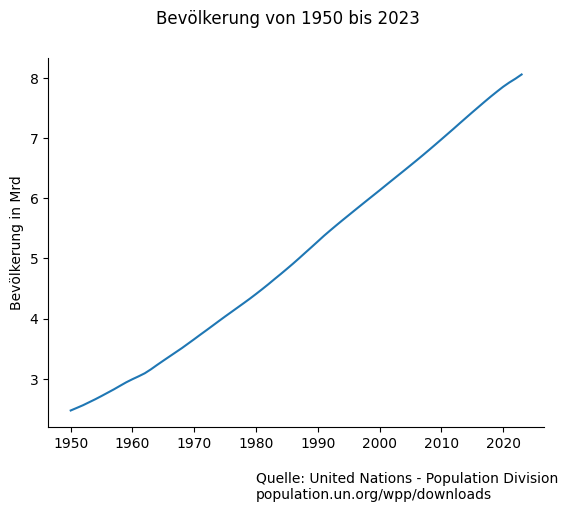

In [6]:
fig, ax = plt.subplots()
fig.suptitle("Bevölkerung von 1950 bis 2023")

ax.plot(df_bevoelk.index,
        df_bevoelk["Bevölkerung"])
ax.set_ylabel("Bevölkerung in Mrd")

ax.spines[["right", "top"]].set_visible(False)

ax.text(x=1980,
        y=1,
        s=quelle
        )

plt.show()

Erstelle Funktion zur Berechnung der Regression und zum Plotten

In [20]:
def regression(deg: int = 1):
    # Berechne Regressionsparameter und erstelle Vorhersage
    coeffs = np.polyfit(df_bevoelk.index, df_bevoelk["Bevölkerung"], deg)  
    jahre_bis_2050 = np.arange(1950, 2051, 1)  
    vorhersage = np.polyval(coeffs, jahre_bis_2050)

    # Plotten
    fig, ax = plt.subplots()
    y_ticks = list(range(2, int(vorhersage[-1]+.5), 2))
    y_ticks.append(vorhersage[-1])

    # Titel
    ax.text(
        x=1962,
        y=max(vorhersage) + 1.5,
        s="Bevölkerung von 1950 bis 2050",
        fontsize=14)

    # Untertitel
    if (deg == 1):
        untertitel = "Vorhersage mit linearer Regression"
    elif(deg == 2):
        untertitel = "Vorhersage mit quadratischer Regression"
    else:
        untertitel = f"Vorhersage mit Regression ({deg}. Grades)"
    
    ax.text(
        x=1963,
        y=max(vorhersage) + 1,
        s=untertitel,
        fontsize=11)
    
    # Plot
    plt.plot(df_bevoelk.index,
            df_bevoelk["Bevölkerung"], 
            marker="o",
            color="blue", 
            label="Historische Daten")  
    plt.plot(jahre_bis_2050,
            vorhersage, 
            ls="--",
            color="red",
            label="Prognose")
    
    ax.set_ylabel("Bevölkerung in Mrd")
    ax.set_yticks(y_ticks)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    ax.axhline(vorhersage[-1], ls=":", color="red")
    ax.text(1977,
            vorhersage[-1]+.1,
            f"Prognose für 2050: {vorhersage[-1]:.2f} Mrd.",
            color="red")

    # Quellenangabe
    ax.text(x=1990,
            y=.2,
            s=quelle
            )
    
    ax.spines[["right", "top"]].set_visible(False)

    plt.legend(loc="lower right")
    plt.show()

Plot lineare Regression

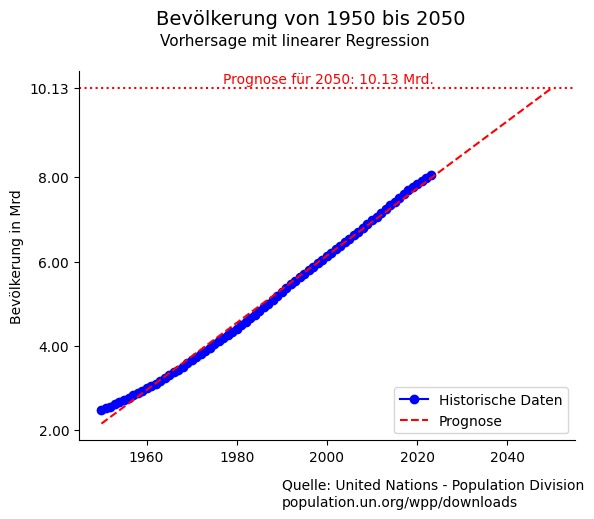

In [17]:
regression(deg=1)

Plot quadratische Regression

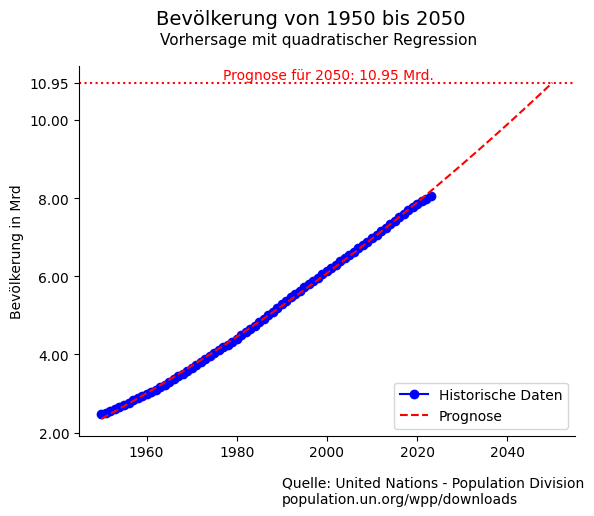

In [21]:
regression(2)